# Exclusions/Data Processing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate

import rho_plus
theme, cs = rho_plus.mpl_setup(is_dark=False)
plt.style.use(theme)

In [2]:
data = pd.read_excel('AnonymizedData.xlsx', sheet_name=None)

In [3]:
# courses = pd.read_csv("Fall 2021 Khoury Ethics Modules - Fall 2021.csv")
courses = data['Courses']
courses.dropna(inplace=True)
courses['CRN'] = courses['CRN'].astype(int).astype(str)
courses.set_index('CRN', inplace=True)
courses.sort_values('Order', inplace=True)
courses['course_name'] = courses['Course'].str.replace(' ', '', regex=False) + '-' + courses['Num'].astype(int).astype(str)
courses

,Course,Num,Title,Meeting Time,Instructor,Ethics Lead,Room,Enrollment (21-Sep),Sessions,Session 1 Date,Order,Session 2 Date,Pre-Survey Link,Post-Survey Link,Post Due Date,course_name
CRN,,,,,,,,,,,,,,,,
18332,CY 2550,3.0,Foundations of Cybersecurity,MR 11:45 am - 1:25 pm,Miazi,Vance,HT 129,87.0,2.0,4-Oct,1.0,29 Nov (Christo),https://neu.co1.qualtrics.com/jfe/form/SV_2gHU...,https://neu.co1.qualtrics.com/jfe/form/SV_6nAi...,11:59pm Fri Oct 15,CY2550-3
15581,CY 2550,1.0,Foundations of Cybersecurity,"T 11:45 am - 1:25 pm, R 2:50 pm - 4:30 pm",Miazi,Vance,ISEC 102,77.0,2.0,5-Oct,2.0,30 Nov (Christo),https://neu.co1.qualtrics.com/jfe/form/SV_9YR0...,https://neu.co1.qualtrics.com/jfe/form/SV_3qk6...,11:59pm Fri Oct 15,CY2550-1
13061,CS 4120,1.0,Natural Language Processing,TF 8:00 am - 9:40 am,Muzny,Meica,SN 108,27.0,2.0,8-Oct,3.0,12-Oct,https://neu.co1.qualtrics.com/jfe/form/SV_eanD...,https://neu.co1.qualtrics.com/jfe/form/SV_51Dg...,11:59pm Fri Oct 15,CS4120-1
15734,CS 4100,2.0,Artificial Intelligence,TF 1:35 pm - 3:15 pm,Wong,Meica,SH 335,78.0,2.0,29-Oct,4.0,30-Nov,https://neu.co1.qualtrics.com/jfe/form/SV_1HvH...,https://neu.co1.qualtrics.com/jfe/form/SV_9TZQ...,11:59pm Fri Dec 10,CS4100-2
13353,CS 4550,1.0,Web Development,TR 7pm-8:30pm,Annunziato,Meica,RI 458,84.0,2.0,18-Nov,5.0,23-Nov,https://neu.co1.qualtrics.com/jfe/form/SV_d0jf...,https://neu.co1.qualtrics.com/jfe/form/SV_0Poy...,11:59pm Wed Dec 8,CS4550-1
11743,CS 4100,1.0,Artificial Intelligence,MW 2:50 pm - 4:30 pm,Marsella,Meica,RI 227,47.0,2.0,29-Nov,6.0,1-Dec,https://neu.co1.qualtrics.com/jfe/form/SV_eQVn...,https://neu.co1.qualtrics.com/jfe/form/SV_2aco...,11:59pm Wed Dec 8,CS4100-1
13354,DS 4400,1.0,Machine Learning and Data Mining 1,TF 9:50 am - 11:30 am,Elhamifar,Vance,SH 305,67.0,2.0,30-Nov,7.0,3-Dec,https://neu.co1.qualtrics.com/jfe/form/SV_0U1x...,https://neu.co1.qualtrics.com/jfe/form/SV_8JpV...,11:59pm Wed Dec 8,DS4400-1


In [4]:
# pre: pd.DataFrame = pd.read_csv('anonymized_pre.csv')
pre: pd.DataFrame = data['Pre-Module']
pre_questions = pre.loc[0]
pre = pre.loc[1:].reset_index(drop=True)
# pre.loc[167, 'ID'] = '0'
pre

,Survey,StartDate,EndDate,Progress,Duration,Finished,Courses,Consent1,Consent2,A1,...,R1,Major,Year,Sex,VSD,NUPath,Philosophy,ID,course,course_name
0,Pre-Module_Fl21_CS4100-1_Marsella,11/23/21 21:52,11/23/21 21:56,100,200,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,5,...,1,Computer Science with a concentration in Systems,5+,Female,Yes,SOCL 4528: Computers and Society,No,A160,cs4100,CS4100-1
1,Pre-Module_Fl21_CS4100-1_Marsella,11/23/21 22:20,11/23/21 22:21,100,71,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,5,...,5,Computer Engineering and Computer Science,3,Male,No,"None, or I'm not sure",No,A66,cs4100,CS4100-1
2,Pre-Module_Fl21_CS4100-1_Marsella,11/24/21 8:25,11/24/21 8:27,100,108,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,4,...,4,Computer Science and Mathematics,4,Male,No,PHIL 1145: Technology and Human Values,Yes,A143,cs4100,CS4100-1
3,Pre-Module_Fl21_CS4100-1_Marsella,11/24/21 12:31,11/24/21 12:36,100,255,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,4,...,4,Computer Science and Math,4,Female,Yes,PHIL 1145: Technology and Human Values,Yes,A156,cs4100,CS4100-1
4,Pre-Module_Fl21_CS4100-1_Marsella,11/24/21 12:52,11/24/21 12:54,100,170,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,4,...,5,Computer Science,5+,Male,I'm not sure,PHIL 1145: Technology and Human Values,No,A199,cs4100,CS4100-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,Pre-Module_Fl21_DS4400_Elhamifar,11/30/21 9:42,11/30/21 9:48,100,319,TRUE,DS 4400 Machine Learning & Data Mining (Ehsan ...,Yes,NaN,4,...,4,CS - AI,2,Male,I'm not sure,PHIL 1145: Technology and Human Values,Yes,A260,NaN,NaN
414,Pre-Module_Fl21_DS4400_Elhamifar,11/30/21 9:49,11/30/21 9:50,100,103,TRUE,DS 4400 Machine Learning & Data Mining (Ehsan ...,Yes,NaN,5,...,1,CS,4,Female,I'm not sure,PHIL 1145: Technology and Human Values,Yes,A59,NaN,NaN
415,Pre-Module_Fl21_DS4400_Elhamifar,11/30/21 9:56,11/30/21 9:58,100,98,TRUE,CS4120 Natural Language Processing (Felix Muzn...,Yes,NaN,4,...,2,Computer Engineering + Computer Science,4,Male,Yes,"None, or I'm not sure",No,A223,NaN,NaN
416,Pre-Module_Fl21_DS4400_Elhamifar,11/30/21 9:56,11/30/21 9:58,100,131,TRUE,DS 4400 Machine Learning & Data Mining (Ehsan ...,Yes,NaN,5,...,5,computer science,2,Male,I'm not sure,PHIL 1145: Technology and Human Values,No,A27,NaN,NaN


In [5]:
# post: pd.DataFrame = pd.read_csv('anonymized_post.csv')
post: pd.DataFrame = data['Post-Module']
post_questions = post.loc[0]
post = post.loc[1:].reset_index(drop=True)
# post.loc[114, 'ID'] = '0'
post

,Survey,StartDate,EndDate,Progress,Duration,Finished,Courses,Consent1,Consent2,A1,...,Feedback,Major,Year,Sex,VSD,NUPath,Philosophy,Attendance,Time,ID
0,Post-Module_Fl21_CS4100-1_Marsella,12/2/21 14:57,12/2/21 14:59,100,122,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,5,...,"No, I really enjoyed the whole experience.",Computer Science and Finance,4,Male,No,PHIL 1145: Technology and Human Values,No,0,Less than 30 minutes,A419
1,Post-Module_Fl21_CS4100-1_Marsella,12/2/21 14:57,12/2/21 14:59,100,120,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,4,...,NaN,Computer Science,4,Male,I'm not sure,PHIL 1145: Technology and Human Values,No,1,Less than 30 minutes,A108
2,Post-Module_Fl21_CS4100-1_Marsella,12/2/21 14:56,12/2/21 15:00,100,269,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,5,...,NaN,Computer Science,4,Female,I'm not sure,PHIL 1145: Technology and Human Values,No,1,Less than 30 minutes,A190
3,Post-Module_Fl21_CS4100-1_Marsella,12/2/21 14:58,12/2/21 15:01,100,146,TRUE,CS4100 Artificial Intelligence (Stacy Marsella...,Yes,NaN,5,...,NaN,Computer Engineering and Computer Science,4,Male,No,INSH 2102: Bostonography: The City through Dat...,Yes,1,Less than 30 minutes,A179
4,Post-Module_Fl21_CS4100-1_Marsella,12/2/21 14:54,12/2/21 15:01,100,407,TRUE,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,5,...,The module could be improved by modifying it t...,Computer Engineering and Computer Science,4,Male,No,"None, or I'm not sure",No,2,Less than 30 minutes,A38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Post-Module_Fl21_DS4400_Elhamifar,12/7/21 0:12,12/7/21 0:17,100,298,TRUE,DS 4400 Machine Learning & Data Mining (Ehsan ...,Yes,NaN,4,...,NaN,Computer Science,3,Male,No,"PHIL 1145: Technology and Human Values,SOCL 45...",I'm not sure,1,Less than 30 minutes,A187
388,Post-Module_Fl21_DS4400_Elhamifar,12/7/21 2:56,12/7/21 2:57,100,38,TRUE,DS 4400 Machine Learning & Data Mining (Ehsan ...,No,"Yes, I am sure.",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A257
389,Post-Module_Fl21_DS4400_Elhamifar,12/7/21 3:45,12/7/21 3:47,100,97,TRUE,CY2550 Foundations of Cybersecurity (Sakib Mia...,Yes,NaN,4,...,NaN,Computer Science,3,Male,Yes,INSH 2102: Bostonography: The City through Dat...,No,2,30 minutes - 1 hour,A94
390,Post-Module_Fl21_DS4400_Elhamifar,12/8/21 14:41,12/8/21 14:43,100,154,TRUE,DS 4400 Machine Learning & Data Mining (Ehsan ...,Yes,NaN,5,...,NaN,comp sci,2,Male,Yes,PHIL 1145: Technology and Human Values,No,2,30 minutes - 1 hour,A27


In [6]:
enrol = data['Enrollment']
enrol['course_name'] = list(courses.set_index('Order').loc[enrol['Order'], 'course_name'])
enrol

,semester,course,instructor,Order,ID,Unnamed: 5,course_name
0,f21,cs4100,marsella,6,NaN,417.0,CS4100-1
1,f21,cs4100,marsella,6,NaN,NaN,CS4100-1
2,f21,cs4100,marsella,6,A419,NaN,CS4100-1
3,f21,cs4100,marsella,6,A101,NaN,CS4100-1
4,f21,cs4100,marsella,6,A214,NaN,CS4100-1
...,...,...,...,...,...,...,...
457,f21,ds4400,elhamifar,7,A52,NaN,DS4400-1
458,f21,ds4400,elhamifar,7,A149,NaN,DS4400-1
459,f21,ds4400,elhamifar,7,A147,NaN,DS4400-1
460,f21,ds4400,elhamifar,7,A411,NaN,DS4400-1


In [7]:
for df in pre, post:
    df['course'] = df['Survey'].str.split('[-_]').map(lambda x: x[3]).str.lower()
    df['course_name'] = df['Survey'].str.replace(r'(\d\d\d\d)_', r'\1-1_', regex=True).str.split('_', expand=True)[2]

unfiltered_pre = pre.copy()
unfiltered_post = post.copy()

In [8]:
print(set(pre['course_name']) == set(courses['course_name']))
print(set(pre['course_name']) == set(enrol['course_name']))
print(set(pre['course_name']) == set(post['course_name']))

True
True
True


Course totals before any filtering: baseline for future charts.

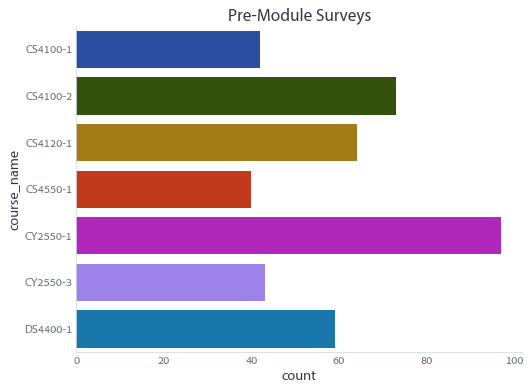

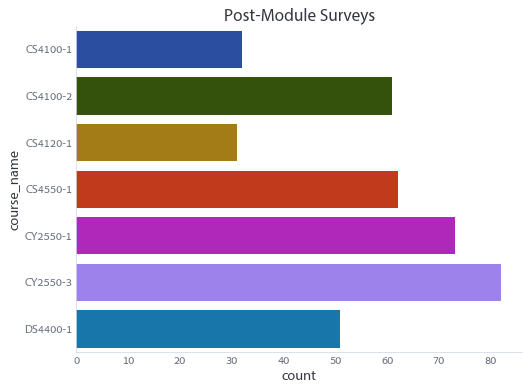

In [9]:
sns.countplot(data=pre, y='course_name')
plt.title('Pre-Module Surveys')
plt.show()
sns.countplot(data=post, y='course_name')
plt.title('Post-Module Surveys');

### Exclusion Criteria
I'll implement the exclusion criteria in roughly the order given in the pre-registration. For reference:

(1) Responses containing irreconcilable evidence that the respondent was not enrolled in the 
relevant course. 

(2) Both pre and post-module survey data for any respondent who completed the pre-module survey 
in less than 60 seconds. 

(3) Both pre and post-module survey data for any respondent who completed the post-module 
survey in less than 90 seconds. 

(4) Both pre and post-module survey data for any respondent who states on the post-module survey 
that they attended or watched 0 ethics module class sessions. 

(5) Both pre and post-module survey data for any respondent who was enrolled in multiple courses 
with ethics modules, but who did not submit the pre-module survey associated with the course with 
the earliest scheduled ethics module class session. 

(6) All survey data for any respondent who completes multiple pre-module surveys, multiple post-multiple [sic] surveys, or one pre-module survey and one post-module survey belonging to different 
courses. 

(7) Any pre or post-module survey data from respondents who only completed one survey. 


#### Criterion 1

Done by checking IDs against course enrollment.

In [10]:
from collections import defaultdict
enrolled_courses = defaultdict(set)
for i, row in enrol.iterrows():
    enrolled_courses[row['ID']].add(row['course_name'])

In [11]:
def enrol_mismatch(df, distinguish_sections=False):
    mismatches = []
    indices = []
    for i, row in df.iterrows():
        if ((not distinguish_sections and (row['course_name'].split('-')[0] not in 
            [x.split('-')[0] for x in enrolled_courses[row['ID']]])) or
            (distinguish_sections and row['course_name'] not in enrolled_courses[row['ID']])):
            mismatches.append(row)
            indices.append(i)

    return pd.DataFrame(data=mismatches, index=indices)

pre_mismatches = enrol_mismatch(pre)    
post_mismatches = enrol_mismatch(post)

print(pre.shape[0], 'pre-module,', pre_mismatches.shape[0], 'removed')
print(post.shape[0],'post-module', post_mismatches.shape[0], 'removed')

418 pre-module, 45 removed
392 post-module 24 removed


CS4120 had some issue, maybe too many graduate students.

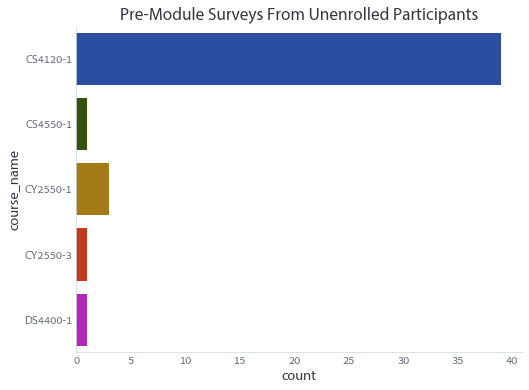

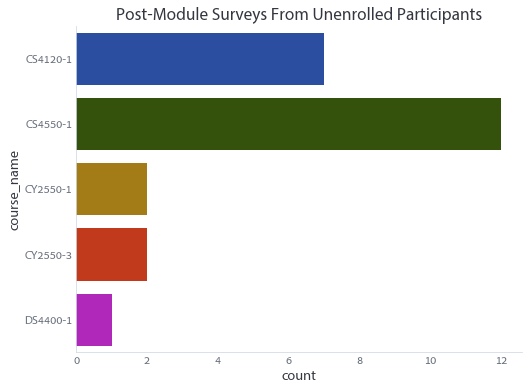

In [12]:
sns.countplot(data=pre_mismatches, y='course_name')
plt.title('Pre-Module Surveys From Unenrolled Participants')
plt.show()
sns.countplot(data=post_mismatches, y='course_name')
plt.title('Post-Module Surveys From Unenrolled Participants');

In [13]:
# if pre_mismatches.index[0] in pre.index:
#     pre.drop(index=pre_mismatches.index, inplace=True)
#     post.drop(index=post_mismatches.index, inplace=True)
# pre.shape[0], post.shape[0]
pre['crit_1'] = ~pre.index.isin(pre_mismatches.index)
post['crit_1'] = ~post.index.isin(post_mismatches.index)

In [14]:
len(set(post.query('crit_1')['ID']) & set(pre.query('crit_1')['ID']))

292

In [15]:
len(set(post['ID']) | set(pre['ID']))

431

#### Criterion 2
This one isn't too hard to search for.

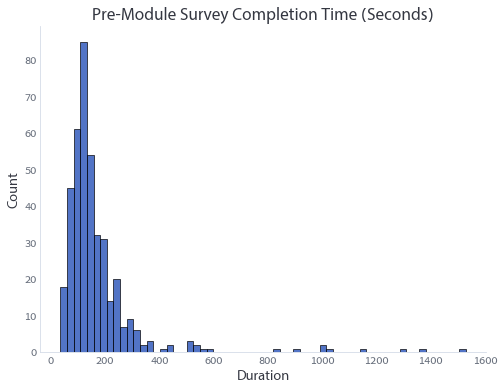

In [16]:
# display(pre.sort_values('Duration').head())
durations = pre['Duration'].astype(int)
sns.histplot(durations[durations < 2000])
plt.title('Pre-Module Survey Completion Time (Seconds)');

In [17]:
pre['Duration'] = pre['Duration'].astype(int)
failed_2_ids = pre.query('Duration < 60')['ID']
print(f'{len(failed_2_ids)} participants who completed in less than 60 seconds')

# print(f'{pre.shape[0]} pre-module responses before filtering for pre-module completion time')
# print(f'{post.shape[0]} post-module responses before filtering for pre-module completion time')
# pre = pre.drop(index=failed_2_ids.index)
# post = post[~post['ID'].isin(failed_2_ids)]
# print(f'{pre.shape[0]} pre-module responses after filtering for pre-module completion time')
# print(f'{post.shape[0]} post-module responses after filtering for pre-module completion time')

pre['crit_2'] = ~pre.index.isin(failed_2_ids.index)
post['crit_2'] = ~post['ID'].isin(failed_2_ids)

18 participants who completed in less than 60 seconds


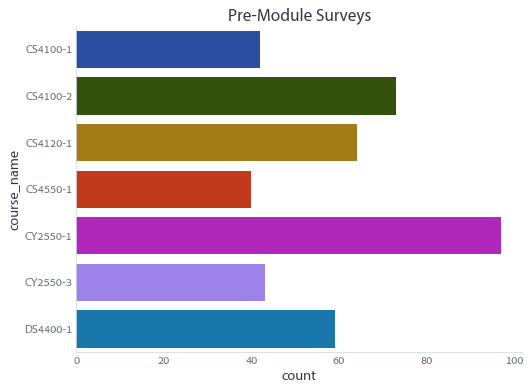

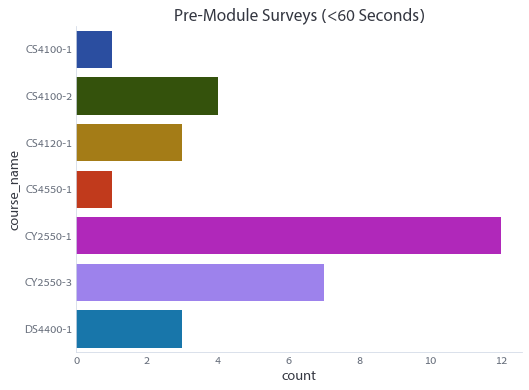

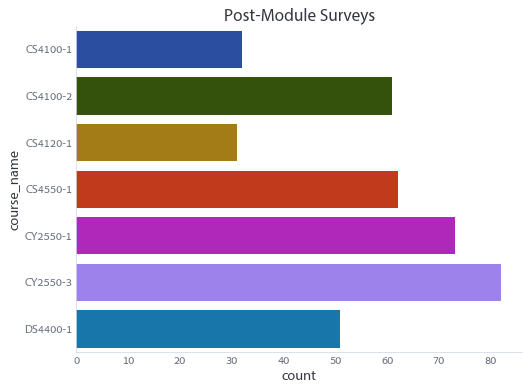

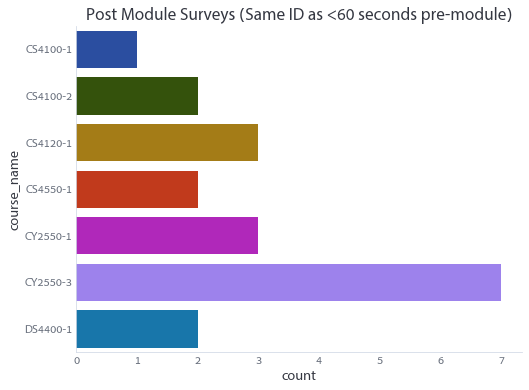

In [18]:
sns.countplot(data=pre, y='course_name')
plt.title('Pre-Module Surveys')
plt.show()
sns.countplot(data=unfiltered_pre.query('ID in @failed_2_ids'), y='course_name')
plt.title('Pre-Module Surveys (<60 Seconds)')
plt.show()
sns.countplot(data=post, y='course_name')
plt.title('Post-Module Surveys')
plt.show()
sns.countplot(data=unfiltered_post.query('ID in @failed_2_ids'), y='course_name')
plt.title('Post Module Surveys (Same ID as <60 seconds pre-module)');

#### Critierion 3
Filtering on post-module survey time, basically the same as the last criterion.

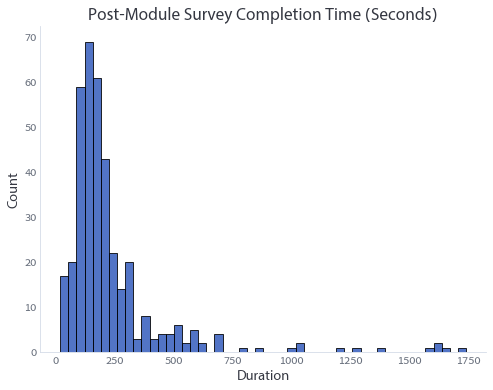

In [19]:
# display(post.sort_values('Duration'))
# we can already see that there are a few major outliers here
post_durations = post['Duration'].astype(int)
sns.histplot(post_durations[post_durations < 2000])
plt.title('Post-Module Survey Completion Time (Seconds)');

In [20]:
# print(f'{pre.shape[0]} pre-module responses before filtering for post-module completion time')
# print(f'{post.shape[0]} post-module responses before filtering for post-module completion time')

post['Duration'] = post['Duration'].astype(int)
failed_3_ids = post.query('Duration < 90')['ID']
pre['crit_3'] = ~pre['ID'].isin(failed_3_ids)
post['crit_3'] = ~post.index.isin(failed_3_ids.index)

print(f'{len(failed_3_ids)} participants who completed in less than 90 seconds')
# pre = pre[~pre['ID'].isin(failed_3_ids)]
# post = post.drop(index=failed_3_ids.index)
# print(f'{pre.shape[0]} pre-module responses after filtering for post-module completion time')
# print(f'{post.shape[0]} post-module responses after filtering for post-module completion time')

39 participants who completed in less than 90 seconds


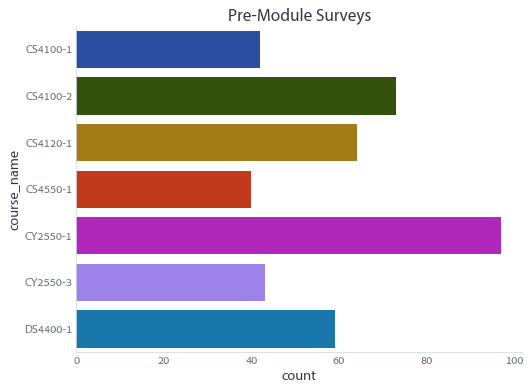

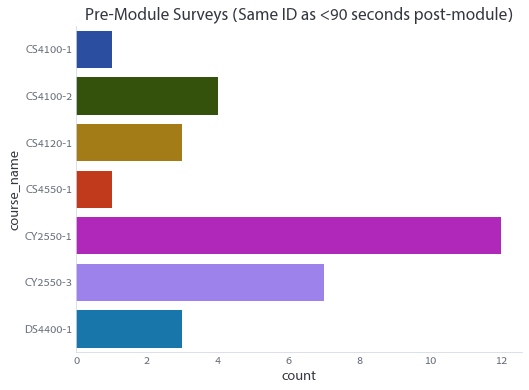

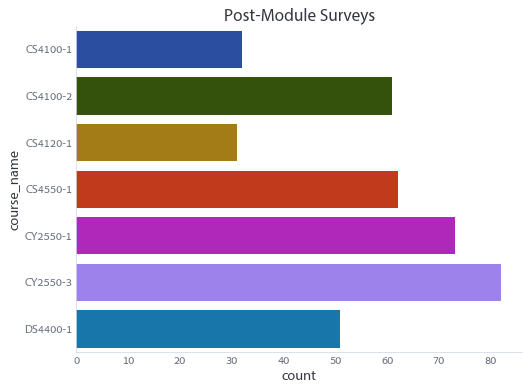

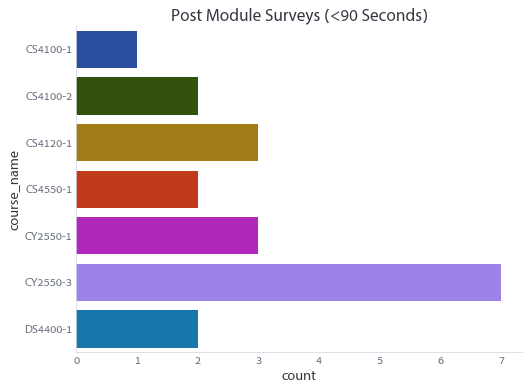

In [21]:
sns.countplot(data=pre, y='course_name')
plt.title('Pre-Module Surveys')
plt.show()
sns.countplot(data=unfiltered_pre.query('ID in @failed_2_ids'), y='course_name')
plt.title('Pre-Module Surveys (Same ID as <90 seconds post-module)')
plt.show()
sns.countplot(data=post, y='course_name')
plt.title('Post-Module Surveys')
plt.show()
sns.countplot(data=unfiltered_post.query('ID in @failed_2_ids'), y='course_name')
plt.title('Post Module Surveys (<90 Seconds)');

#### Criterion 4

Removing 40 surveys


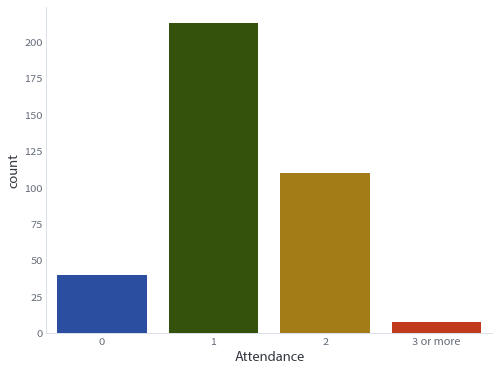

In [22]:
sns.countplot(data=post, x='Attendance')
print(f'Removing {sum(post["Attendance"] == 0)} surveys')

did_not_attend = post.query('Attendance == 0')['ID']

pre['crit_4'] = ~pre['ID'].isin(did_not_attend)
post['crit_4'] = ~post['ID'].isin(did_not_attend)
# print(pre.shape[0], post.shape[0])
# pre = pre[~pre['ID'].isin(did_not_attend)]
# post = post[~post['ID'].isin(did_not_attend)]
# print(pre.shape[0], post.shape[0])


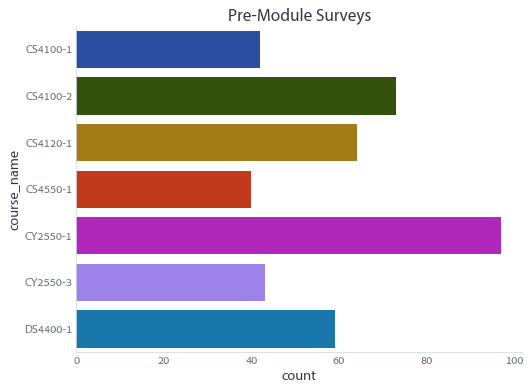

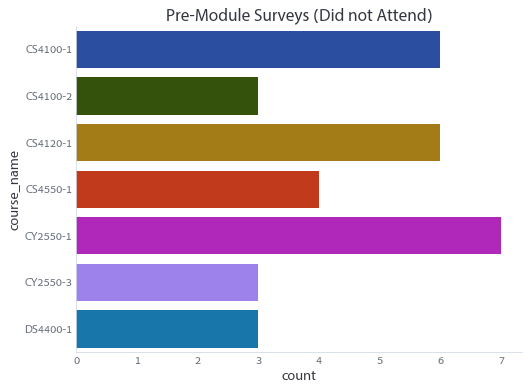

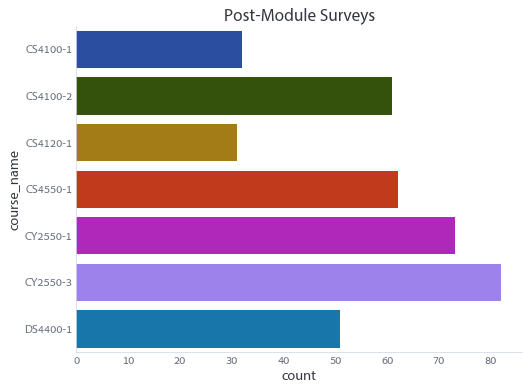

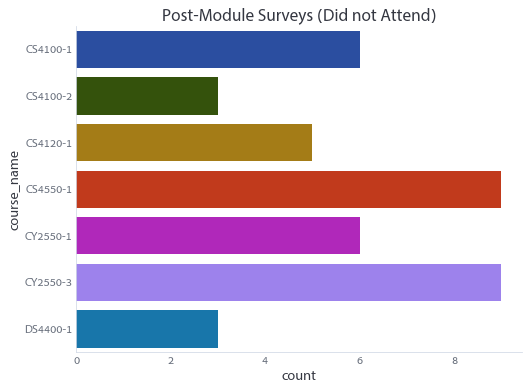

In [23]:
sns.countplot(data=pre, y='course_name')
plt.title('Pre-Module Surveys')
plt.show()
sns.countplot(data=unfiltered_pre.query('ID in @did_not_attend'), y='course_name')
plt.title('Pre-Module Surveys (Did not Attend)')
plt.show()
sns.countplot(data=post, y='course_name')
plt.title('Post-Module Surveys')
plt.show()
sns.countplot(data=unfiltered_post.query('ID in @did_not_attend'), y='course_name')
plt.title('Post-Module Surveys (Did not Attend)');

#### Criteria 6 & 7
We do this before 5 so, if you have two submitted surveys and one is not the first, we don't mistakenly think you did in fact only do one.

Basically, "you have to take exactly one pre- and post-module survey, and they have to match"

In [24]:
no_pre = []
no_post = []
too_many_pre = []
too_many_post = []
course_mismatch = []
good = []

# if False, count all sections as the same course for the purposes of this criterion
DISTINGUISH_SECTIONS = False

# do no-pre using post IDs, because obviously all pre IDs are in the pre
for id in post['ID']:
    if pre.query('ID == @id').shape[0] == 0:
        no_pre.append(id)

for id in pre['ID']:
    pre_subs = pre.query('ID == @id')
    post_subs = post.query('ID == @id')

    if pre_subs.shape[0] >= 2:
        too_many_pre.append(id)
    elif post_subs.shape[0] == 0:
        no_post.append(id)
    elif post_subs.shape[0] >= 2:
        too_many_post.append(id)
    elif ((pre_subs.iloc[0]['course_name'].split('-')[0] != post_subs.iloc[0]['course_name'].split('-')[0] and not DISTINGUISH_SECTIONS) or
    ((pre_subs.iloc[0]['course_name'] != post_subs.iloc[0]['course_name'] and DISTINGUISH_SECTIONS))):
        course_mismatch.append(id)
    else:
        good.append(id)

for name, ids in zip(
    ('No Pre-Module', 'No Post-Module', 'Too Many Pre-Module', 'Too Many Post-Module', 'Course Mismatch', 'Good'),
    (no_pre, no_post, too_many_pre, too_many_post, course_mismatch, good)
):
    print(f'{name:>30}\t{len(ids)}')

print('{:>30}\t{}'.format('Total', len(pre['ID'])))

                 No Pre-Module	60
                No Post-Module	71
           Too Many Pre-Module	88
          Too Many Post-Module	15
               Course Mismatch	4
                          Good	240
                         Total	418


In [25]:
pre['crit_6'] = ~pre['ID'].isin(too_many_post + course_mismatch + too_many_pre)
post['crit_6'] = ~post['ID'].isin(too_many_post + course_mismatch + too_many_pre)
pre['crit_7'] = ~pre['ID'].isin(no_pre + no_post)
post['crit_7'] = ~post['ID'].isin(no_pre + no_post)


# print(pre.shape[0], post.shape[0])
# pre = pre[pre['ID'].isin(good)]
# post = post[post['ID'].isin(good)]
# print(pre.shape[0], post.shape[0])

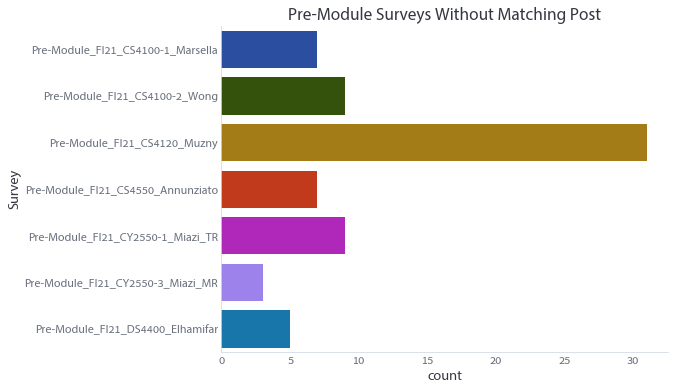

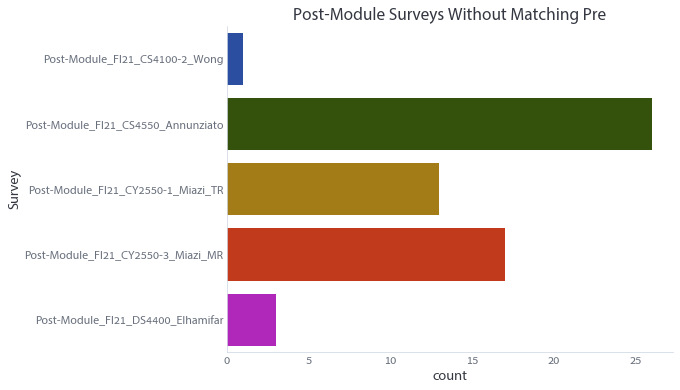

In [26]:
pre_no_post = unfiltered_pre[unfiltered_pre['ID'].isin(no_post)]
post_no_pre = unfiltered_post[unfiltered_post['ID'].isin(no_pre)]

sns.countplot(data=pre_no_post, y='Survey')
plt.title('Pre-Module Surveys Without Matching Post')
plt.show();
sns.countplot(data=post_no_pre, y='Survey')
plt.title('Post-Module Surveys Without Matching Pre');

#### Criterion 5
#### (Excluding Participants Who Did Not Take The First Available Pre Survey)

If a participant was enrolled in more than one course, they had to take the first one available.

This excludes some of the people that took things in a different section from what they were enrolled in, if those people were included previously.

In [27]:
course_order = {name: order for name, order in zip(courses['course_name'], courses['Order'].astype(int))}
course_order

{'CY2550-3': 1,
 'CY2550-1': 2,
 'CS4120-1': 3,
 'CS4100-2': 4,
 'CS4550-1': 5,
 'CS4100-1': 6,
 'DS4400-1': 7}

In [28]:
enrolled_orders = defaultdict(set)
for i, row in enrol.iterrows():
    # remove "-1" from ends of course names
    enrolled_orders[row['ID']].add(row['Order'])

first_enrolled = {k: min(v) for k, v in enrolled_orders.items()}

In [29]:
no_first = []
for _i, row in pre.iterrows():    
    # if there is no record of their enrollment, return 1, which will cause this to be true
    # they are excluded from criterion 7 instead
    if row['ID'] not in first_enrolled:
        # if no enrollment, then don't count this ID under criterion 5
        continue
    else:
        first = first_enrolled[row['ID']]
        
    actual = course_order[row['course_name']]    

    # special-case the people who used the wrong section survey, assuming that they were in fact in the section they're enrolled in
    if {first, actual} == {1, 2}:
        continue
    elif actual not in enrolled_orders[row['ID']]:
        # took survey for course they weren't registered for: not an exclusion by this criterion
        continue
    elif first != actual:        
        no_first.append(row['ID'])
        # if row['crit_1'] and row['crit_6'] and row['crit_7']:
        #    print(row['ID'], row['Name'], first, actual)

len(set(no_first))

30

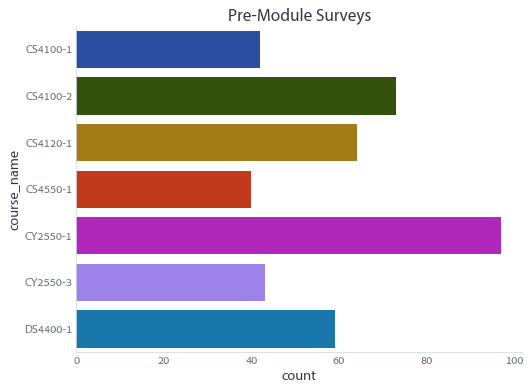

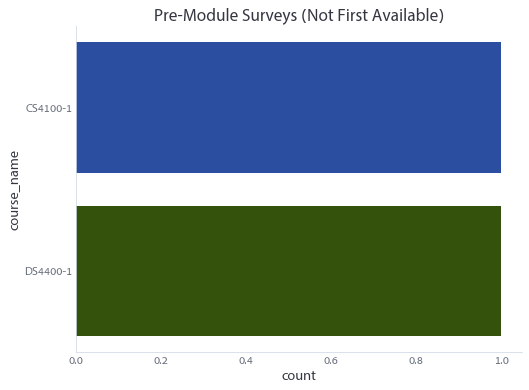

In [30]:
sns.countplot(data=pre, y='course_name')
plt.title('Pre-Module Surveys')
plt.show()
sns.countplot(data=pre.query('crit_6 and crit_7 and ID in @no_first'), y='course_name')
plt.title('Pre-Module Surveys (Not First Available)');

In [31]:
pre['crit_5'] = ~pre['ID'].isin(no_first)
post['crit_5'] = ~post['ID'].isin(no_first)

# print(pre.shape[0], post.shape[0])
# pre = pre[~pre['ID'].isin(no_first)]
# post = post[~post['ID'].isin(no_first)]
# print(pre.shape[0], post.shape[0])

Filtering NaNs

We also remove null responses. Only one of these is from a respondent who got through the rest of the criteria, and they have nulls for everything.

In [32]:
is_post_null = post[pd.isnull(post['A1'])]['ID']
# display(pre.query('ID in @is_post_null'))
# display(post.query('ID in @is_post_null'))

pre['is_not_null'] = ~pre['ID'].isin(is_post_null)
post['is_not_null'] = ~post['ID'].isin(is_post_null)
# print(pre.shape[0], post.shape[0])
# pre = pre.query('ID not in @is_post_null')
# post = post.query('ID not in @is_post_null')
# print(pre.shape[0], post.shape[0])

In [33]:
criteria = [f'crit_{num}' for num in range(1, 8)] + ['is_not_null']
filtered_pre = pre[pre[criteria].all(axis=1)]
filtered_post = post[post[criteria].all(axis=1)]


# number of pre- and post-module responses before and after filtering
print(pre.shape[0], post.shape[0])
print(filtered_pre.shape[0], filtered_post.shape[0])

418 392
189 189


In [51]:
pre.to_csv('unfiltered_pre.csv')
post.to_csv('unfiltered_post.csv')

filtered_pre.to_csv('filtered_pre.csv')
filtered_post.to_csv('filtered_post.csv')

# Paper Results

In [52]:
unfiltered_pre = pd.read_csv('unfiltered_pre.csv')
unfiltered_post = pd.read_csv('unfiltered_post.csv')

for df in (unfiltered_pre, unfiltered_post):
    print('Pre-module:' if df.shape == unfiltered_pre.shape else 'Post-module:')
    print('Number of responses:', len(df.index))
    print('Number of unique responses:', len(set(df['ID'])))
    print(' ')

Pre-module:
Number of responses: 37
Number of unique responses: 37
 
Post-module:
Number of responses: 37
Number of unique responses: 37
 


In [53]:
cols = ['ID'] + [f'crit_{i}' for i in range(1, 8)]
unfiltered = pd.concat([unfiltered_pre[cols], unfiltered_post[cols]])

no_enrol = set(unfiltered.query('~crit_1')['ID'])
no_time = set(unfiltered.query('~crit_2 | ~crit_3')['ID'])
no_attend = set(unfiltered.query('~crit_4')['ID'])
no_earliest = set(unfiltered.query('~crit_5')['ID'])
mismatch = set(unfiltered.query('~crit_6')['ID'])
no_complete = set(unfiltered.query('~crit_7')['ID'])

sets = [no_enrol, no_time, no_attend, no_earliest, mismatch, no_complete]
descs = ['No enrollment', 'Completed survey in too little time', 'Did not attend module', 'Did not complete survey for earliest course', 
'Mismatch between pre- and post-module course', 'Did not complete survey']
for desc, s in zip(descs, sets):    
    print(desc + ':', len(s))

print('\nTotal exclusions:', end=' ')

multi = set()
for s in sets:
    multi |= s
print(len(multi))

No enrollment: 0
Completed survey in too little time: 0
Did not attend module: 0
Did not complete survey for earliest course: 0
Mismatch between pre- and post-module course: 0
Did not complete survey: 0

Total exclusions: 0


In [54]:
pre = pd.read_csv('filtered_pre.csv')
post = pd.read_csv('filtered_post.csv')

# each pre-module reseponse has a matching post-module response
assert(set(pre['ID']) == set(post['ID']))

# index the post table to match the pre-module table in order
post = post.set_index('ID', drop=True).loc[pre['ID']].reset_index()

# exact match between each corresponding row ID
assert((pre['ID'] == post['ID']).all())

In [55]:
# Merge rows
df = pd.merge(pre, post[['ID', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'R1', 'R2', 'Attendance', 'Time']], on='ID', suffixes=['_pre', '_post'], how='inner')
df.head()

,Unnamed: 0,Survey,StartDate,EndDate,Progress,Duration,Finished,Courses,Consent1,Consent2,...,A3_post,A4_post,A5,A6,A7,A8,R1_post,R2,Attendance,Time
0,2,Pre-Module_Fl21_CS4100-1_Marsella,11/24/21 8:25,11/24/21 8:27,100,108,True,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,...,1,5,5,4,3,4,4,2,1,Less than 30 minutes
1,8,Pre-Module_Fl21_CS4100-1_Marsella,11/26/21 10:28,11/26/21 10:31,100,174,True,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,...,3,4,5,5,4,3,5,2,2,Less than 30 minutes
2,9,Pre-Module_Fl21_CS4100-1_Marsella,11/26/21 16:01,11/26/21 16:04,100,183,True,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,...,2,5,4,4,3,5,4,3,2,Less than 30 minutes
3,11,Pre-Module_Fl21_CS4100-1_Marsella,11/27/21 11:10,11/27/21 11:12,100,132,True,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,...,1,5,5,5,4,5,2,4,2,Less than 30 minutes
4,12,Pre-Module_Fl21_CS4100-1_Marsella,11/27/21 19:12,11/27/21 19:38,100,1530,True,CS4100 Artificial Intelligence (Stacy Marsella),Yes,NaN,...,2,4,4,4,4,3,5,3,1,More than 3 hours


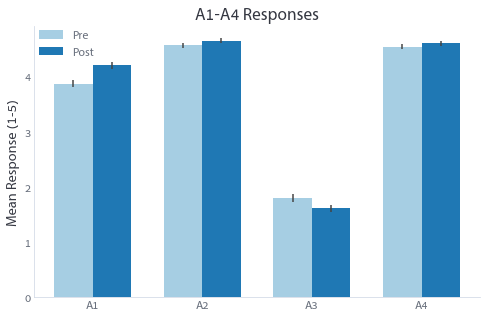

In [56]:
cols1 = ['A1', 'A2', 'A3', 'A4']
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(cols1))
w = 0.35

pal = sns.color_palette('Paired')

df_pre = df[[f'{col}_pre' for col in cols1]]
df_post = df[[f'{col}_post' for col in cols1]]

def stderr(nums):
    return np.std(nums) / np.sqrt(len(nums))

pre_se = np.array([stderr(df_pre[col]) for col in df_pre.columns])
post_se = np.array([stderr(df_post[col]) for col in df_post.columns])

ax.bar(x - w / 2, df_pre.mean(axis=0), width=w, label='Pre', color=pal[0])
ax.bar(x + w / 2, df_post.mean(axis=0), width=w, label='Post', color=pal[1])
ax.errorbar(x - w / 2, df_pre.mean(axis=0), yerr=pre_se, color='#444', fmt='none', elinewidth=1.5)
ax.errorbar(x + w / 2, df_post.mean(axis=0), yerr=post_se, color='#444', fmt='none', elinewidth=1.5)

ax.set_ylabel('Mean Response (1-5)')
ax.set_title('A1-A4 Responses')
ax.set_xticks(x, cols1)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0., frameon=False)


fig.savefig('results/a14-pre-post.png', bbox_inches='tight')

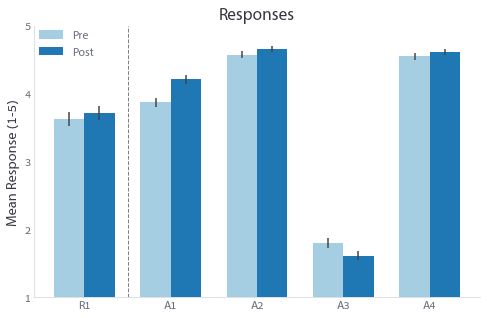

In [57]:
cols1 = ['R1', 'A1', 'A2', 'A3', 'A4']
fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(len(cols1))
w = 0.35

df_pre = df[[f'{col}_pre' for col in cols1]]
df_post = df[[f'{col}_post' for col in cols1]]

def stderr(nums):
    return np.std(nums) / np.sqrt(len(nums))

pre_se = np.array([stderr(df_pre[col]) for col in df_pre.columns])
post_se = np.array([stderr(df_post[col]) for col in df_post.columns])

ax.bar(x - w / 2, df_pre.mean(axis=0), width=w, label='Pre', color=pal[0])
ax.bar(x + w / 2, df_post.mean(axis=0), width=w, label='Post', color=pal[1])
ax.errorbar(x - w / 2, df_pre.mean(axis=0), yerr=pre_se, color='#444', fmt='none', elinewidth=1.5)
ax.errorbar(x + w / 2, df_post.mean(axis=0), yerr=post_se, color='#444', fmt='none', elinewidth=1.5)

ylim = [1, 5]
ax.set_ylim(*ylim)
ax.set_yticks(np.arange(ylim[0], ylim[1] + 1))

border_x = (x[0] + x[1]) / 2
ax.plot([border_x, border_x], ylim, c='gray', ls='--', lw=1)

ax.set_ylabel('Mean Response (1-5)')
ax.set_title('Responses')
ax.set_xticks(x, cols1)
ax.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0., frameon=False)

fig.savefig('results/a14-r1-pre-post.png', bbox_inches='tight')

In [58]:
def format_pval(pval):
    return f'p = {pval:.3f}' if pval > 0.0005 else 'p < 0.001'

In [59]:
tb_kws = dict(tablefmt='html', floatfmt='.2f', showindex=False, headers='keys')
rows = []
for col in ['A1', 'A2', 'A3', 'A4']:
    rows.append([
        col,
        (post[col] - pre[col]).mean(),
        ((post[col] - pre[col]) - (post['R1'] - pre['R1'])).mean(),
        format_pval(stats.wilcoxon(pre[col], post[col], zero_method='pratt')[1]),
        format_pval(stats.ttest_rel(pre[col], post[col])[1]),
        format_pval(stats.wilcoxon(pre[col] - post[col], pre['R1'] - post['R1'], zero_method='pratt')[1]),
        format_pval(stats.ttest_rel(pre[col] - post[col], pre['R1'] - post['R1'])[1])
    ])

col = 'A3'
print('~A3 against ~R1')
print('Mean Difference Against', '{:.2f}'.format(((post[col] - pre[col]) - (-(post['R1'] - pre['R1']))).mean()))
print('Wilcoxon Against', format_pval(stats.wilcoxon(pre[col] - post[col], -(pre['R1'] - post['R1']), zero_method='pratt')[1]))
print('Student Against', format_pval(stats.ttest_rel(pre[col] - post[col], -(pre['R1'] - post['R1']))[1]))

table = pd.DataFrame(rows, columns=[
    'Question', 
    'Mean Difference', 'Mean Difference Against R1', 
    'Wilcoxon (Post vs. Pre)', 'Student T (Post vs. Pre)',
    'Wilcoxon (Against R1 Difference)', 'Student T (Against R1 Difference)'])    
tabulate(table, **tb_kws)

~A3 against ~R1
Mean Difference Against -0.11
Wilcoxon Against p = 0.208
Student Against p = 0.278


Question,Mean Difference,Mean Difference Against R1,Wilcoxon (Post vs. Pre),Student T (Post vs. Pre),Wilcoxon (Against R1 Difference),Student T (Against R1 Difference)
A1,0.34,0.26,p < 0.001,p < 0.001,p = 0.002,p = 0.004
A2,0.08,0.00,p = 0.025,p = 0.043,p = 0.707,p = 1.000
A3,-0.19,-0.26,p = 0.007,p = 0.007,p = 0.027,p = 0.004
A4,0.06,-0.02,p = 0.104,p = 0.169,p = 0.895,p = 0.837


In [60]:
rows = []
for col in ['A1', 'A2', 'A3', 'A4', 'R1']:
    rows.append([
        col,
        np.sum(pre[col] == post[col]),
        np.sum(pre[col] < post[col]),        
        np.sum(pre[col] > post[col]),
    ])

table = pd.DataFrame(rows, columns=[
    'Question', 
    'No Change',
    'Post Increase',
    'Post Decrease'])
tabulate(table, **tb_kws)

Question,No Change,Post Increase,Post Decrease
A1,77,81,31
A2,151,26,12
A3,124,22,43
A4,130,36,23
R1,118,41,30


In [61]:
rows = []
for col in ['A1', 'A2', 'A3', 'A4', 'R1']:
    extreme = 5 if col != 'A3' else 1
    rows.append([
        col,
        np.sum(pre[col] == extreme),
        '{:.1%}'.format(np.mean(pre[col] == extreme))
    ])

table = pd.DataFrame(rows, columns=[
    'Question', 
    '# Extreme Responses',
    '% Extreme Responses'])
tabulate(table, **tb_kws)

Question,# Extreme Responses,% Extreme Responses
A1,47,24.9%
A2,121,64.0%
A3,95,50.3%
A4,116,61.4%
R1,69,36.5%


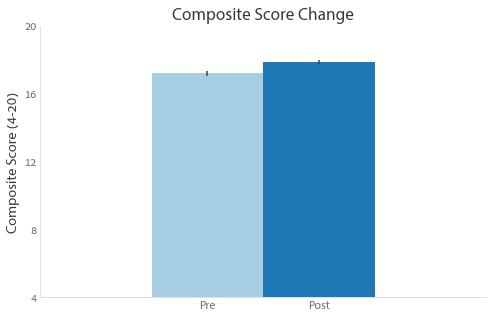

In [62]:
combo_pre = pre.eval('A1 + A2 + (6 - A3) + A4')
combo_post = post.eval('A1 + A2 + (6 - A3) + A4')

fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(1)
w = 0.5

pre_se = stderr(combo_pre)
post_se = stderr(combo_post)

ax.bar(x - w / 2, combo_pre.mean(axis=0), width=w, label='Pre', color=pal[0])
ax.bar(x + w / 2, combo_post.mean(axis=0), width=w, label='Post', color=pal[1])
ax.errorbar(x - w / 2, combo_pre.mean(axis=0), yerr=pre_se, color='#444', fmt='none', elinewidth=1.5)
ax.errorbar(x + w / 2, combo_post.mean(axis=0), yerr=post_se, color='#444', fmt='none', elinewidth=1.5)

ylim = [4, 20]
ax.set_ylim(*ylim)
ax.set_yticks(np.arange(ylim[0], ylim[1] + 1, 4))

ax.set_ylabel('Composite Score (4-20)')
ax.set_title('Composite Score Change')
ax.set_xlim(-1, 1)
ax.set_xticks([x[0] - w / 2, x[0] + w / 2])
ax.set_xticklabels(['Pre', 'Post'])

fig.savefig('results/a14-combo-pre-post-bar.png', bbox_inches='tight')

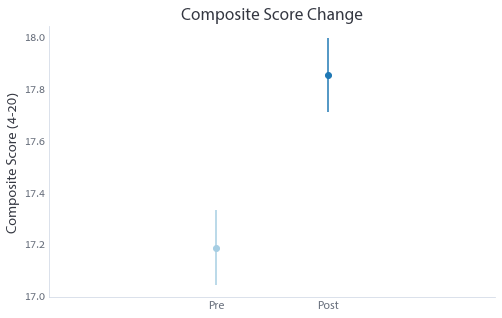

In [63]:
combo_pre = pre.eval('A1 + A2 + (6 - A3) + A4')
combo_post = post.eval('A1 + A2 + (6 - A3) + A4')

fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(1)
w = 0.5

pre_se = stderr(combo_pre)
post_se = stderr(combo_post)

ax.errorbar(x - w / 2, combo_pre.mean(axis=0), yerr=pre_se, color=pal[0], fmt='none', elinewidth=1.5)
ax.errorbar(x + w / 2, combo_post.mean(axis=0), yerr=post_se, color=pal[1], fmt='none', elinewidth=1.5)
ax.scatter(x - w / 2, combo_pre.mean(axis=0), label='Pre', color=pal[0])
ax.scatter(x + w / 2, combo_post.mean(axis=0), label='Post', color=pal[1])

# ylim = [4, 20]
# ax.set_ylim(*ylim)
# ax.set_yticks(np.arange(ylim[0], ylim[1] + 1, 4))

ax.set_ylabel('Composite Score (4-20)')
ax.set_title('Composite Score Change')
ax.set_xlim(-1, 1)
ax.set_xticks([x[0] - w / 2, x[0] + w / 2])
ax.set_xticklabels(['Pre', 'Post'])

fig.savefig('results/a14-combo-pre-post-point.png', bbox_inches='tight')

In [64]:
def likert_heatmap(x, y, lo=None, hi=None):
    if lo is None:
        lo = min(min(x), min(y))

    if hi is None:
        hi = max(max(x), max(y))
    ii = range(lo, hi + 1)
    jj = range(lo, hi + 1)
    data = pd.DataFrame(index=pd.Series(jj[::-1], name=x.name), columns=pd.Series(ii, name=x.name), dtype=int)
    for i in ii:
        for j in jj:
            data.loc[j, i] = int(np.sum((y == j) & (x == i)))

    return data

WilcoxonResult(statistic=4589.5, pvalue=4.763923034003598e-07)
Ttest_relResult(statistic=-5.096438384845471, pvalue=8.393504113456904e-07)


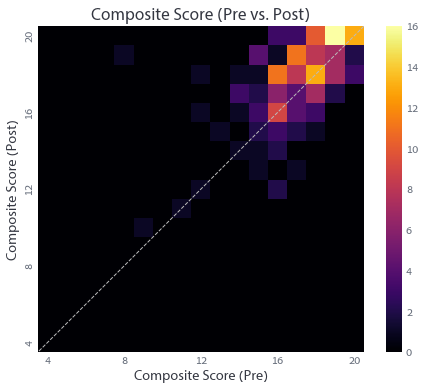

In [65]:
print(stats.wilcoxon(combo_pre, combo_post, zero_method='pratt'))
print(stats.ttest_rel(combo_pre, combo_post))

ax = sns.heatmap(likert_heatmap(combo_pre, combo_post, lo=4, hi=20), square=True, cmap='inferno')
ax.set_xlabel('Composite Score (Pre)')
ax.set_xticks(ax.get_xticks()[::4])
ax.set_ylabel('Composite Score (Post)')
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title('Composite Score (Pre vs. Post)')
ax.plot([17, 0], [0, 17], scalex=False, scaley=False, c='#bbb', ls='--', lw=1)

plt.savefig('results/combo-heatmap.png', bbox_inches='tight')

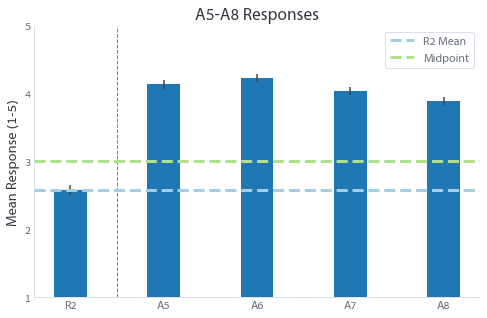

In [66]:
cols2 = ['A5', 'A6', 'A7', 'A8']
fig, ax = plt.subplots(figsize=(8, 5))

x = 1 + np.arange(len(cols2))
w = 0.35

pal = sns.color_palette('Paired')

y = np.array([np.mean(df[col]) for col in cols2])
se = np.array([stderr(df[col]) for col in cols2])

ax.bar(x, y, width=w, color=pal[1])
ax.errorbar(x, y, yerr=se, color='#444', fmt='none', elinewidth=1.5)

ax.bar(0, df['R2'].mean(), width=w, color=pal[1])
ax.errorbar(0, df['R2'].mean(), yerr=stderr(df['R2']), color='#444', fmt='none', elinewidth=1.5)

ylim = [1, 5]
ax.set_ylim(*ylim)
ax.set_yticks(np.arange(ylim[0], ylim[1] + 1))

border_x = (x[0] + x[1]) / 2 - 1
ax.plot([border_x, border_x], ylim, c='gray', ls='--', lw=1)

ax.plot(ax.get_xlim(), [df['R2'].mean(), df['R2'].mean()], ls='--', c=pal[0], label='R2 Mean', scalex=False)
ax.plot(ax.get_xlim(), [3, 3], ls='--', c=pal[2], label='Midpoint', scalex=False)
ax.legend()

ax.set_ylabel('Mean Response (1-5)')
ax.set_title('A5-A8 Responses')
ax.set_xticks([0, *x], ['R2', *cols2])

fig.savefig('results/a58.png', bbox_inches='tight')

In [67]:
rows = []
for col in ['R2', 'A5', 'A6', 'A7', 'A8']:    
    rows.append([
        col,
        np.mean(df[col]),
        format_pval(stats.wilcoxon(df[col], df['R2'], zero_method='pratt')[1]) if col != 'R2' else '',
        format_pval(stats.wilcoxon(df[col] - 3, zero_method='pratt')[1])
    ])

table = pd.DataFrame(rows, columns=[
    'Question', 
    'Mean Response (1-5)',
    'Wilcoxon Against R2',
    'Wilcoxon Against R2'])
tabulate(table, **tb_kws)

Question,Mean Response (1-5),Wilcoxon Against R2,Wilcoxon Against R2
R2,2.58,,p < 0.001
A5,4.13,p < 0.001,p < 0.001
A6,4.23,p < 0.001,p < 0.001
A7,4.03,p < 0.001,p < 0.001
A8,3.88,p < 0.001,p < 0.001
